In [33]:
import optuna
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from eval_help import *

In [34]:
[s.study_name for s in optuna.study.get_all_study_summaries(storage="sqlite://///store-01.hpi.uni-potsdam.de/fg/doellner/florence.boettger/counterfactuals/optimize_counterfactuals_full.db")]

['optimize_counterfactuals_full',
 'optimize_counterfactuals_full_lower_range',
 'optimize_counterfactuals_2',
 'optimize_counterfactuals_vgg_distance',
 'optimize_counterfactuals_vgg_distance_real',
 'optimize_counterfactuals_vgg_distance_final',
 'optimize_counterfactuals_resnet',
 'optimize_counterfactuals_initial']

In [35]:
study = optuna.load_study(storage="sqlite://///store-01.hpi.uni-potsdam.de/fg/doellner/florence.boettger/counterfactuals/optimize_counterfactuals_full.db", study_name="optimize_counterfactuals_initial2")

In [36]:
# study = optuna.create_study(
#     storage="sqlite://///store-01.hpi.uni-potsdam.de/fg/doellner/florence.boettger/counterfactuals/optimize_counterfactuals_full.db",
#     study_name="optimize_counterfactuals_resnet",
#     directions=["maximize", "minimize"],
# )
# study = optuna.load_study(storage="sqlite://///store-01.hpi.uni-potsdam.de/fg/doellner/florence.boettger/counterfactuals/optimize_counterfactuals_full.db", study_name="optimize_counterfactuals_resnet")
# study.enqueue_trial(
#     {
#         "lambd2": 10,
#         "max_dist": 0
#     }
# )
# study.enqueue_trial(
#     {
#         "lambd2": 0,
#         "max_dist": 0
#     }
# )

In [37]:
len(study.trials)

6

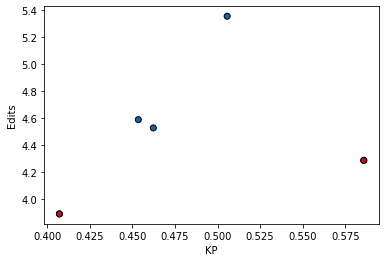

In [38]:
plot_study(study, "initial")

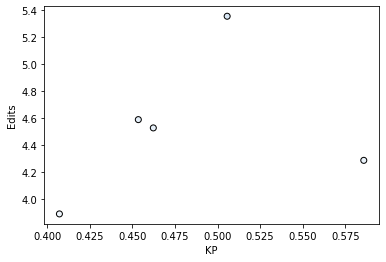

In [39]:
plot_study(study, "initial_lambd2", print_pareto=False, map=lambda t: t.params["lambd2"] / 10)

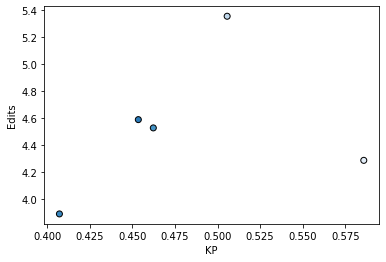

In [40]:
plot_study(study, "initial_max_dist", print_pareto=False, map=lambda t: t.params["max_dist"] / 3)

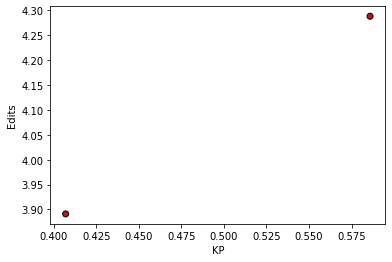

In [41]:
plot_study(study, "initial_pareto", print_others=False)

In [42]:
np.average([t.params["max_dist"] for t in study.best_trials])

1.144183321896834

In [43]:
optuna.visualization.plot_pareto_front(study, target_names=["KP", "edits"])

In [44]:
optuna.visualization.plot_contour(study, params=["lambd2", "max_dist"], target=lambda t: t.values[0], target_name="KP")

In [45]:
optuna.visualization.plot_contour(study, params=["lambd2", "max_dist"], target=lambda t: t.values[1], target_name="edits")

In [46]:
x_names = ["lambd2", "max_dist"]
spearman = study_spearman(study, x_names, 2)

In [47]:
for i in range(len(x_names)):
    x_name = x_names[i]
    print(f"{x_name} spearman correlation is: {spearman.correlation[i][len(x_names)]} on KP, {spearman.correlation[i][len(x_names) + 1]} on edits.")
    print(f"{x_name} spearman pvalue is: {spearman.pvalue[i][len(x_names)]} on KP, {spearman.pvalue[i][len(x_names) + 1]} on edits.")

lambd2 spearman correlation is: 0.3 on KP, 0.9999999999999999 on edits.
lambd2 spearman pvalue is: 0.6238376647810728 on KP, 1.4042654220543672e-24 on edits.
max_dist spearman correlation is: -0.8999999999999998 on KP, 0.0 on edits.
max_dist spearman pvalue is: 0.03738607346849874 on KP, 1.0 on edits.
